No zero pressure values detected.


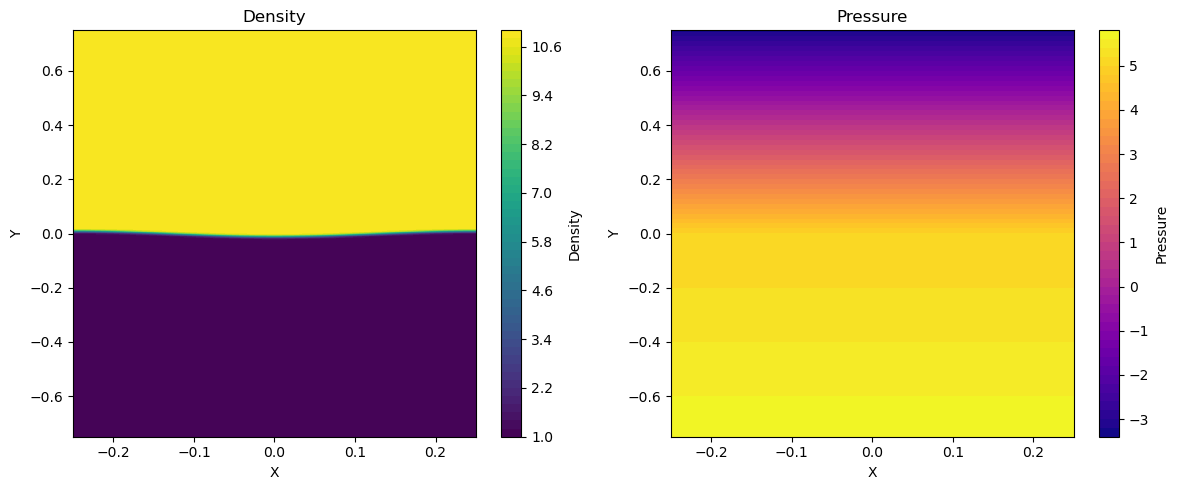

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
dens = 1.0
drat = 2.0
damp = 5.0
pres = 5.0
ycut = 0.0
kper = 1.0
lper = 0.01
hdel = 0.005
gacc = -1.0
xmax = 0.25
xmin = -0.25
ymax = 0.75
ymin = -0.75

# Grid setup
nx = 128
ny = 256

xlen = xmax - xmin
two_pi = 2.0 * np.pi

# Create grid
x1 = np.linspace(xmin, xmax, nx)
x2 = np.linspace(ymin, ymax, ny)
X1, X2 = np.meshgrid(x1, x2)

# Initialize density and pressure arrays
density = np.zeros_like(X1)
pressure = np.zeros_like(X1)

# Compute density and pressure
for i in range(nx):
    for j in range(ny):
        x1_val = X1[j, i]
        x2_val = X2[j, i]
        
        yp = 0.5 * lper * (np.cos(two_pi * kper * (x1_val - xmin) / xlen) +
                           np.cos(two_pi * kper * (xmax - x1_val) / xlen)) + ycut
        
        if x2_val <= ycut:
            rho = dens
        else:
            rho = dens * drat
        
        rho = dens + damp * (1.0 + np.tanh((x2_val - yp) / hdel))
        p = pres + rho * gacc * x2_val
        
        density[j, i] = rho
        pressure[j, i] = p


# Check for zero pressure values
zero_pressure_indices = np.where(pressure == 0)
if zero_pressure_indices[0].size > 0:
    print(f"Zero pressure detected at grid points: {zero_pressure_indices}")
else:
    print("No zero pressure values detected.")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Density
c1 = ax[0].contourf(X1, X2, density, 50, cmap='viridis')
fig.colorbar(c1, ax=ax[0], label='Density')
ax[0].set_title('Density')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_aspect('equal')
# Plot Pressure
c2 = ax[1].contourf(X1, X2, pressure, 50, cmap='plasma')
fig.colorbar(c2, ax=ax[1], label='Pressure')
ax[1].set_title('Pressure')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_aspect('equal')
plt.tight_layout()
plt.show()